# 主成分分析

In [1]:
import pandas as pd

In [13]:
live=pd.read_csv('live.csv',encoding='gb2312')
X=live.iloc[:,1:8]
live.head()


,District,GDP,Income,Consumption,Employment,Education,Health,Life
0,北京,45444,17652.95,13244.20,0.3937,584.43,1295.76,76.10
1,山西,12495,8913.91,6342.63,0.2554,548.83,538.70,71.65
2,内蒙古,16331,9136.79,6928.60,0.2158,504.77,533.36,69.87
3,吉林,13348,8690.62,6794.71,0.1836,502.08,675.77,73.10
4,黑龙江,14434,8272.51,6178.01,0.2418,479.85,613.15,72.37


In [3]:
def PCA(x,components=None):
    if components==None:
        components=int(x.size/len(x))
    average=np.mean(x,axis=0)
    sigma=np.std(x,axis=0,ddof=1)
    r,c=np.shape(x)
    data_standardized=[]
    mu=np.tile(average,(r,1))
    data_standardized=(x-mu)/sigma
    cov_matrix=np.cov(data_standardized.T)
    EigenValue,EigenVector=np.linalg.eig(cov_matrix)
    index=np.argsort(-EigenValue)
    Score=[]
    Selected_Vector=EigenVector.T[index[:components]]
    Score=data_standardized*np.matrix(Selected_Vector.T)
    return EigenValue[index],Selected_Vector,np.array(Score)

In [2]:
import numpy as np

In [16]:
EigenValue,Vector,Score=PCA(np.asarray(X))
live_ev=pd.DataFrame((EigenValue),columns=['Eigenvalue'],
                    index=list(range(1,8)))
prop=live_ev['Eigenvalue']/live_ev['Eigenvalue'].sum()
s=0
p,c=[],[]
for i in range(1,len(prop)+1):
    s+=prop[i]
    p.append(prop[i])
    c.append(s)
live_ev['Proportion']=p
live_ev['Cumulative']=c
live_ev

,Eigenvalue,Proportion,Cumulative
1,4.725499,0.675071,0.675071
2,1.234341,0.176334,0.851406
3,0.448662,0.064095,0.915500
4,0.306114,0.043731,0.959231
5,0.213755,0.030536,0.989767
6,0.060574,0.008653,0.998421
7,0.011054,0.001579,1.000000


In [18]:
live_ev=pd.DataFrame(Vector,index=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7'],columns=(live.columns)[1:8]).T
live_ev

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7
GDP,0.441618,0.073883,0.083499,-0.153700,-0.325047,-0.796130,0.171583
Income,0.447192,-0.029164,-0.193227,-0.036980,-0.358861,0.213764,-0.765499
Consumption,0.435590,-0.016302,-0.394963,-0.035468,-0.276029,0.450039,0.611568
Employment,0.122961,0.827743,0.098366,-0.463616,0.231263,0.143879,-0.030374
Education,0.365034,-0.397744,-0.255464,-0.336966,0.718524,-0.101607,-0.056051
Health,0.374018,0.307351,-0.001732,0.801352,0.345642,-0.062374,-0.010942
Life,0.356365,-0.235799,0.851325,-0.055691,0.011964,0.288153,0.079822


In [19]:
live_S=pd.DataFrame(live['District'])
live_S['Prin1_Score']=Score[:,0]
live_S['Prin2_Score']=Score[:,1]
live_S['Score']=Score[:,0]*0.675071+Score[:,1]*0.176334
live_S.sort_values(by='Score',ascending=False)

,District,Prin1_Score,Prin2_Score,Score
0,北京,5.697979,3.551375,4.472769
5,上海,6.049685,-1.500794,3.819326
7,浙江,3.817791,-1.245874,2.357590
6,江苏,1.154256,-1.300429,0.549895
8,福建,0.540295,0.011427,0.366753
9,山东,0.422840,-0.329803,0.227292
15,重庆,0.412800,-1.337303,0.042857
4,黑龙江,-0.571680,0.418921,-0.312054
3,吉林,-0.327915,-0.535612,-0.315813
1,山西,-0.581030,0.404957,-0.320829


In [20]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib

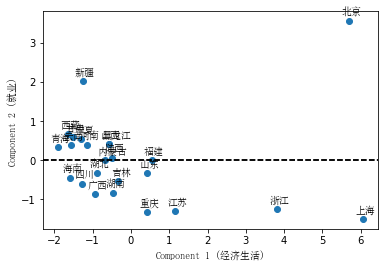

In [22]:
myfont = matplotlib.font_manager.FontProperties(fname="simsun.ttc")
fig,ax=plt.subplots(1)
ax.plot(live_S['Prin1_Score'],live_S['Prin2_Score'],'o')
ax.set_xlabel('Component 1 (经济生活)',fontproperties=myfont)
ax.set_ylabel('Component 2 (就业)',fontproperties=myfont)
ax.axhline(live_S['Prin1_Score'].mean(),color='k',ls='--')
ax.axhline(live_S['Prin2_Score'].mean(),color='k',ls='--')
dotxy=tuple(zip(live_S['Prin1_Score']-0.2,
               live_S['Prin2_Score']+0.15))
i=-1
for dot in dotxy:
    i+=1
    ax.annotate(live_S.iloc[i]['District'],xy=dot,fontproperties=myfont)

In [8]:
from sklearn.decomposition import PCA as skPCA
from sklearn.preprocessing import scale
x=scale(X)
live_pca2=skPCA(n_components=len(X.columns)).fit(x)

In [26]:
live_pca2.explained_variance_ratio_

array([0.67507132, 0.17633444, 0.06409455, 0.04373058, 0.03053648,
       0.00865347, 0.00157915])

In [27]:
live_pca2.components_

array([[ 0.44161842,  0.44719158,  0.4355896 ,  0.12296062,  0.3650339 ,
         0.37401802,  0.35636501],
       [ 0.07388346, -0.02916376, -0.01630157,  0.82774347, -0.39774384,
         0.30735092, -0.23579859],
       [-0.08349857,  0.19322704,  0.39496334, -0.09836587,  0.25546362,
         0.00173219, -0.8513253 ],
       [-0.15369971, -0.03697985, -0.03546836, -0.46361551, -0.33696562,
         0.80135152, -0.05569072],
       [-0.32504735, -0.35886119, -0.27602861,  0.23126301,  0.71852416,
         0.34564199,  0.01196397],
       [ 0.79612966, -0.21376358, -0.4500389 , -0.14387884,  0.10160667,
         0.06237445, -0.28815288],
       [ 0.17158256, -0.76549902,  0.61156775, -0.03037356, -0.05605106,
        -0.01094167,  0.07982213]])

In [28]:
live_pca2.transform(x)[:,:2]

array([[ 5.82053058e+00,  3.62775703e+00],
       [-5.93527114e-01,  4.13666985e-01],
       [-6.81887725e-01, -4.44541795e-03],
       [-3.34967853e-01, -5.47131743e-01],
       [-5.83975125e-01,  4.27930723e-01],
       [ 6.17980083e+00, -1.53307269e+00],
       [ 1.17908199e+00, -1.32839801e+00],
       [ 3.89990352e+00, -1.27267020e+00],
       [ 5.51915946e-01,  1.16731070e-02],
       [ 4.31934797e-01, -3.36896398e-01],
       [-1.16143241e+00,  3.92864715e-01],
       [-8.98307512e-01, -3.39653118e-01],
       [-4.73019121e-01, -8.59679414e-01],
       [-9.58228194e-01, -8.95659830e-01],
       [-1.62819568e+00, -4.69669275e-01],
       [ 4.21678287e-01, -1.36606580e+00],
       [-1.30053942e+00, -6.13173495e-01],
       [-1.61281735e+00,  3.81056842e-01],
       [-1.66884829e+00,  6.77516578e-01],
       [-5.03811182e-01,  6.53758715e-02],
       [-1.53563722e+00,  6.13099918e-01],
       [-1.93725027e+00,  3.37511610e-01],
       [-1.32573357e+00,  5.46612801e-01],
       [-1.

In [37]:
x1=(X-X.mean())/X.std(ddof=1)
live_pca2.transform(x1)[:,:2]

array([[ 5.69797937e+00,  3.55137464e+00],
       [-5.81030407e-01,  4.04957231e-01],
       [-6.67530587e-01, -4.35181972e-03],
       [-3.27915108e-01, -5.35611890e-01],
       [-5.71679535e-01,  4.18920646e-01],
       [ 6.04968518e+00, -1.50079386e+00],
       [ 1.15425643e+00, -1.30042860e+00],
       [ 3.81779109e+00, -1.24587414e+00],
       [ 5.40295361e-01,  1.14273298e-02],
       [ 4.22840415e-01, -3.29803048e-01],
       [-1.13697846e+00,  3.84592953e-01],
       [-8.79393656e-01, -3.32501725e-01],
       [-4.63059708e-01, -8.41578873e-01],
       [-9.38052709e-01, -8.76801721e-01],
       [-1.59391403e+00, -4.59780393e-01],
       [ 4.12799855e-01, -1.33730330e+00],
       [-1.27315658e+00, -6.00263134e-01],
       [-1.57885950e+00,  3.73033694e-01],
       [-1.63371071e+00,  6.63251473e-01],
       [-4.93203443e-01,  6.39993832e-02],
       [-1.50330439e+00,  6.00191106e-01],
       [-1.89646148e+00,  3.30405307e-01],
       [-1.29782027e+00,  5.35103875e-01],
       [-1.

In [30]:
import mdp
live_pca3=mdp.pca(np.asarray(X))
live_pca3

array([[ 3.08132637e+04,  6.17202942e+01, -2.81634977e+02,
        -4.51608838e+02,  4.74853060e+00,  1.15311774e+00,
        -4.09748423e-02],
       [-3.95851400e+03,  7.85797396e+02,  3.24549205e+02,
         3.71159584e+01, -7.52156763e+01, -4.52955600e-01,
        -4.94809773e-02],
       [-1.46874055e+02,  1.39413799e+03, -1.25888144e+02,
         3.45368260e+01,  1.60357658e+01, -1.28460128e+00,
         2.72029597e-02],
       [-3.12217320e+03,  8.95110890e+02, -2.01027723e+02,
        -8.21345294e+01, -1.05929224e+02,  2.56594531e+00,
         4.90894450e-02],
       [-2.29806000e+03,  1.91653117e+03, -8.51442599e+01,
        -3.34377844e+01, -7.98094710e+01,  1.04973918e+00,
        -2.11374420e-03],
       [ 3.68980950e+04,  8.16986012e+02, -2.56823429e+02,
         3.11378274e+02,  1.72961383e+01, -1.17096898e+00,
         3.47746477e-02],
       [ 8.78036238e+03,  5.43537261e+02,  4.30708448e+02,
         8.93822709e+01,  3.51542361e+01, -5.48070882e-01,
         4.6317918

# 因子分析

In [4]:
import pandas as pd
ic=pd.read_csv('internet_cafe.csv')
ic.head()

,No,Switch,Connection,Speed,Transformation,Offline,Timeliness,Initiative,Attitude,Skill,Consideration,Standard,Settlement,Success,Efficiency
0,24,8,8,8,8,8,1,1,2,2,2,2,2,2,2
1,14,3,10,4,3,2,7,1,10,6,9,6,5,6,5
2,40,7,6,5,6,6,6,6,6,6,5,5,6,5,5
3,25,4,5,2,4,6,5,5,8,5,5,2,4,6,5
4,64,3,5,3,3,3,5,8,5,9,8,8,8,5,6


In [7]:
X=ic.iloc[:,1:len(ic.columns)]

In [8]:
from sklearn.decomposition import FactorAnalysis as skFA
x1=(X-X.mean())/X.std(ddof=1)
ic_fa=skFA(n_components=2).fit(x1)

In [9]:
ic_ev=pd.DataFrame(ic_fa.components_,index=['Factor1','Factor2'],
                  columns=(ic.columns)[1:len(ic.columns)]).T
ic_ev

,Factor1,Factor2
Switch,-0.582475,0.528556
Connection,-0.429028,0.454938
Speed,-0.485041,0.692095
Transformation,-0.597188,0.726102
Offline,-0.446861,0.350302
Timeliness,-0.774073,-0.195317
Initiative,-0.720337,-0.341741
Attitude,-0.800199,-0.191607
Skill,-0.877507,-0.134740
Consideration,-0.713259,-0.313348


In [9]:
skPCA().fit(x1).explained_variance_ratio_

array([0.56809628, 0.17452022, 0.05608952, 0.04657723, 0.03539289,
       0.03051194, 0.02372083, 0.0173827 , 0.013038  , 0.01021827,
       0.0090125 , 0.00743606, 0.00424777, 0.00375577])

In [11]:
EigenValue,Vector,Score=PCA(np.asarray(x1))
x1_ev=pd.DataFrame((EigenValue),columns=['Eigenvalue'],
                  index=list(range(1,15)))
prop=x1_ev['Eigenvalue']/x1_ev['Eigenvalue'].sum()
s=0
p,c=[],[]
for i in range(1,len(prop)+1):
    s+=prop[i]
    p.append(prop[i])
    c.append(s)
x1_ev['Proportion']=p
x1_ev['Cumulative']=c
x1_ev

,Eigenvalue,Proportion,Cumulative
1,7.953348,0.568096,0.568096
2,2.443283,0.174520,0.742617
3,0.785253,0.056090,0.798706
4,0.652081,0.046577,0.845283
5,0.495501,0.035393,0.880676
6,0.427167,0.030512,0.911188
7,0.332092,0.023721,0.934909
8,0.243358,0.017383,0.952292
9,0.182532,0.013038,0.965330
10,0.143056,0.010218,0.975548


In [12]:
ic['Factor1']=ic_fa.transform(x1)[:,0]
ic['Factor2']=ic_fa.transform(x1)[:,1]
print(ic)

    No  Switch  Connection  Speed  Transformation  Offline  Timeliness  \
0   24       8           8      8               8        8           1   
1   14       3          10      4               3        2           7   
2   40       7           6      5               6        6           6   
3   25       4           5      2               4        6           5   
4   64       3           5      3               3        3           5   
..  ..     ...         ...    ...             ...      ...         ...   
65  15       9           8      7               9       10           9   
66  36       8           8      7               7       10          10   
67  48       9           9      8               9        9           9   
68  30       8           8      7               7       10          10   
69  39       9           7      8              10       10           5   

    Initiative  Attitude  Skill  Consideration  Standard  Settlement  Success  \
0            1         2      

In [15]:
import pandas as pd
import numpy as np
class FA(object):
    def __init__(self,component,gamma=1.0,q=20,tol=1e-8):
            '''
            gamma、q、to1:均为最大方差正交旋转的参数，无特殊需求默认即可
            '''
            self.component=component
            self.gamma=gamma
            self.q=q
            self.tol=tol
    def var_contributation(self,data):
            var_name=data.columns
            data=np.array(data)
            z=(data-data.mean())/data.std(ddof=1)
            cor=np.corrcoef(z,rowvar=0)
            eigvalue,eigvector=np.linalg.eig(cor)
            eigdf=pd.DataFrame(eigvector.T).join(pd.DataFrame(eigvalue,
                                                                 dtype=float,
                                                                 columns=["eigvalue"]))
            eigdf=eigdf.sort_values("eigvalue")[::-1]
            eigvector=np.array(eigdf.iloc[:,:-1])
            eigvalue=list(np.array(eigvalue,dtype=float))
            eigvalue.sort(reverse=True)
            varcontribution=list(np.array(eigvalue/sum(eigvalue),dtype=float))
            leiji_varcontribution=[]
            for i in range(len(varcontribution)):
                s=float(sum(varcontribution[:i+1]))
                leiji_varcontribution.append(s)
            col=["Eigvalue","Proportion","Cumulative"]
            eig_df=pd.DataFrame({"Eigvalue":eigvalue,"Proportion":varcontribution,"Cumulative":leiji_varcontribution},columns=col)
            self.eigvalue=eigvalue
            self.eigvector=eigvector
            return eig_df
    def loadings(self,data):
            factor_num=self.component
            eigvalue=self.var_contributation(data)['Eigvalue']
            duijiao=list(np.array(np.sqrt(eigvalue[:factor_num]),dtype=float))
            eigmat=np.diag(duijiao)
            zaihe=np.dot(self.eigvector[:factor_num].T,eigmat)
            self.zaihe=zaihe
            n=range(1,factor_num+1)
            col=[]
            for i in n:
                c="Factor"+str(i)
                col.append(c)
            zaihe=-pd.DataFrame(zaihe,columns=col)
            zaihe.iloc[:,1]=-zaihe.iloc[:,1]
            self.col=col
            zaihe.index=data.columns
            self.zaihe=zaihe
            return zaihe
    def varimax_rotation(self,data):
            zaihe=self.loadings(data)
            m,n=zaihe.shape
            R=np.eye(n)
            d=0
            for i in range(self.q):
                d_init=d
                Lambda=np.dot(zaihe,R)
                w,a,wa=np.linalg.svd(np.dot(zaihe.T,np.asarray(Lambda)**3-(self.gamma/m)*np.dot(Lambda,np.diag(np.diag(np.dot(Lambda.T,Lambda))))))
                R=np.dot(w,wa)
                d=np.sum(a)
                if d_init!=0 and d/d_init<1+self.tol:
                    break
            orthogonal=np.dot(zaihe,R)
            self.orthogonal=orthogonal
            return pd.DataFrame(orthogonal,index=data.columns,columns=self.col)
    def score_coef(self,data):
            corr=np.corrcoef(data,rowvar=0)
            A=self.varimax_rotation(data)
            coefficient=pd.DataFrame(np.dot(np.array(A).T,np.mat(corr).I),columns=data.columns,index=self.col)
            self.coefficient=coefficient
            return coefficient
    def score(self,data):
            data_scale=(data-data.mean())/data.std(ddof=1)
            F=np.dot(data_scale,self.coefficient.T)
            F=pd.DataFrame(F)
            col2=[]
            n=range(1,self.component+1)
            for i in n:
                 c="Score F"+str(i)
                 col2.append(c)
            F.columns=col2
            return F

In [16]:
list(filter(lambda x:x[0]!='_',dir(FA(component=2))))

['component',
 'gamma',
 'loadings',
 'q',
 'score',
 'score_coef',
 'tol',
 'var_contributation',
 'varimax_rotation']

In [20]:
ic_fa=FA(component=2)
contributation=ic_fa.var_contributation(X)
contributation

,Eigvalue,Proportion,Cumulative
0,7.953348,0.568096,0.568096
1,2.443283,0.174520,0.742617
2,0.785253,0.056090,0.798706
3,0.652081,0.046577,0.845283
4,0.495501,0.035393,0.880676
5,0.427167,0.030512,0.911188
6,0.332092,0.023721,0.934909
7,0.243358,0.017383,0.952292
8,0.182532,0.013038,0.965330
9,0.143056,0.010218,0.975548


In [25]:
loadings=ic_fa.loadings(X)
loadings

,Factor1,Factor2
Switch,0.612655,0.629533
Connection,0.473459,0.549148
Speed,0.494931,0.677657
Transformation,0.595114,0.691249
Offline,0.508545,0.501489
Timeliness,0.816996,-0.239573
Initiative,0.751754,-0.385172
Attitude,0.833623,-0.185283
Skill,0.883247,-0.151843
Consideration,0.751921,-0.341353


In [21]:
rotated_loadings=ic_fa.varimax_rotation(X)
rotated_loadings

,Factor1,Factor2
Switch,0.254884,0.840650
Connection,0.168188,0.705294
Speed,0.128211,0.829299
Transformation,0.210946,0.887405
Offline,0.221250,0.679086
Timeliness,0.835723,0.162619
Initiative,0.844677,0.003322
Attitude,0.825545,0.218478
Skill,0.854255,0.270980
Consideration,0.824691,0.042318


In [22]:
coef=ic_fa.score_coef(X)
coef.T

,Factor1,Factor2
Switch,-0.049975,0.264243
Connection,-0.050402,0.226980
Speed,-0.072171,0.274936
Transformation,-0.063540,0.285664
Offline,-0.037521,0.211682
Timeliness,0.136292,-0.039889
Initiative,0.156388,-0.096586
Attitude,0.127939,-0.019193
Skill,0.127192,-0.004170
Consideration,0.148166,-0.080648


In [26]:
s=ic_fa.score(X)
print(s)
s['No']=ic['No']
print(s)

    Score F1  Score F2
0  -4.720298  1.490705
1  -1.068727 -1.546361
2  -1.716230 -0.430939
3  -1.845551 -1.519396
4  -0.410580 -2.496639
..       ...       ...
65  0.707706  0.695638
66  1.021206  0.233221
67  0.738977  0.897714
68  0.407164  0.274135
69 -0.033078  1.191218

[70 rows x 2 columns]
    Score F1  Score F2  No
0  -4.720298  1.490705  24
1  -1.068727 -1.546361  14
2  -1.716230 -0.430939  40
3  -1.845551 -1.519396  25
4  -0.410580 -2.496639  64
..       ...       ...  ..
65  0.707706  0.695638  15
66  1.021206  0.233221  36
67  0.738977  0.897714  48
68  0.407164  0.274135  30
69 -0.033078  1.191218  39

[70 rows x 3 columns]


In [24]:
print ('Cafe No.%2.f is the min of Factor1: %.4f' % (s[s['Score F1']==s['Score F1'].min()]['No'],s['Score F1'].min()))
print ('Cafe No.%2.f is the min of Factor2: %.4f' % (s[s['Score F2']==s['Score F2'].min()]['No'],s['Score F2'].min()))

Cafe No.24 is the min of Factor1: -4.7203
Cafe No.38 is the min of Factor2: -3.3790
